# Data Exploration

## Categorical Columns Analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

In [3]:
df = pd.read_csv("../data/raw/student-combine.csv")

In [4]:
# Lọc các cột categorical
cat_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical colums: {cat_cols}")

Categorical colums: Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'subject'],
      dtype='object')


### Value Distribution

In [5]:
# Hàm phân tích
def analyze_distrubution_cat_col(colname, df):
    print(f"\nCATEGORICAL COLUMN: {colname.upper()}")

    unique_count = df[colname].nunique()
    print(f"- Unique value: {unique_count}")
    
    print(f"- Column distribution:")
    val_counts = df[colname].value_counts()
    distributions = df[colname].value_counts(normalize= True) * 100
    
    for val, count in val_counts.head(5).items():
        percent = distributions[val]
        print(f"{str(val):<10} | {count:>8} | {percent:>7.2f}%")   

In [6]:
for col in cat_cols:
    analyze_distrubution_cat_col(col, df)


CATEGORICAL COLUMN: SCHOOL
- Unique value: 2
- Column distribution:
GP         |      772 |   73.95%
MS         |      272 |   26.05%

CATEGORICAL COLUMN: SEX
- Unique value: 2
- Column distribution:
F          |      591 |   56.61%
M          |      453 |   43.39%

CATEGORICAL COLUMN: ADDRESS
- Unique value: 2
- Column distribution:
U          |      759 |   72.70%
R          |      285 |   27.30%

CATEGORICAL COLUMN: FAMSIZE
- Unique value: 2
- Column distribution:
GT3        |      738 |   70.69%
LE3        |      306 |   29.31%

CATEGORICAL COLUMN: PSTATUS
- Unique value: 2
- Column distribution:
T          |      923 |   88.41%
A          |      121 |   11.59%

CATEGORICAL COLUMN: MJOB
- Unique value: 5
- Column distribution:
other      |      399 |   38.22%
services   |      239 |   22.89%
at_home    |      194 |   18.58%
teacher    |      130 |   12.45%
health     |       82 |    7.85%

CATEGORICAL COLUMN: FJOB
- Unique value: 5
- Column distribution:
other      |      584 |   

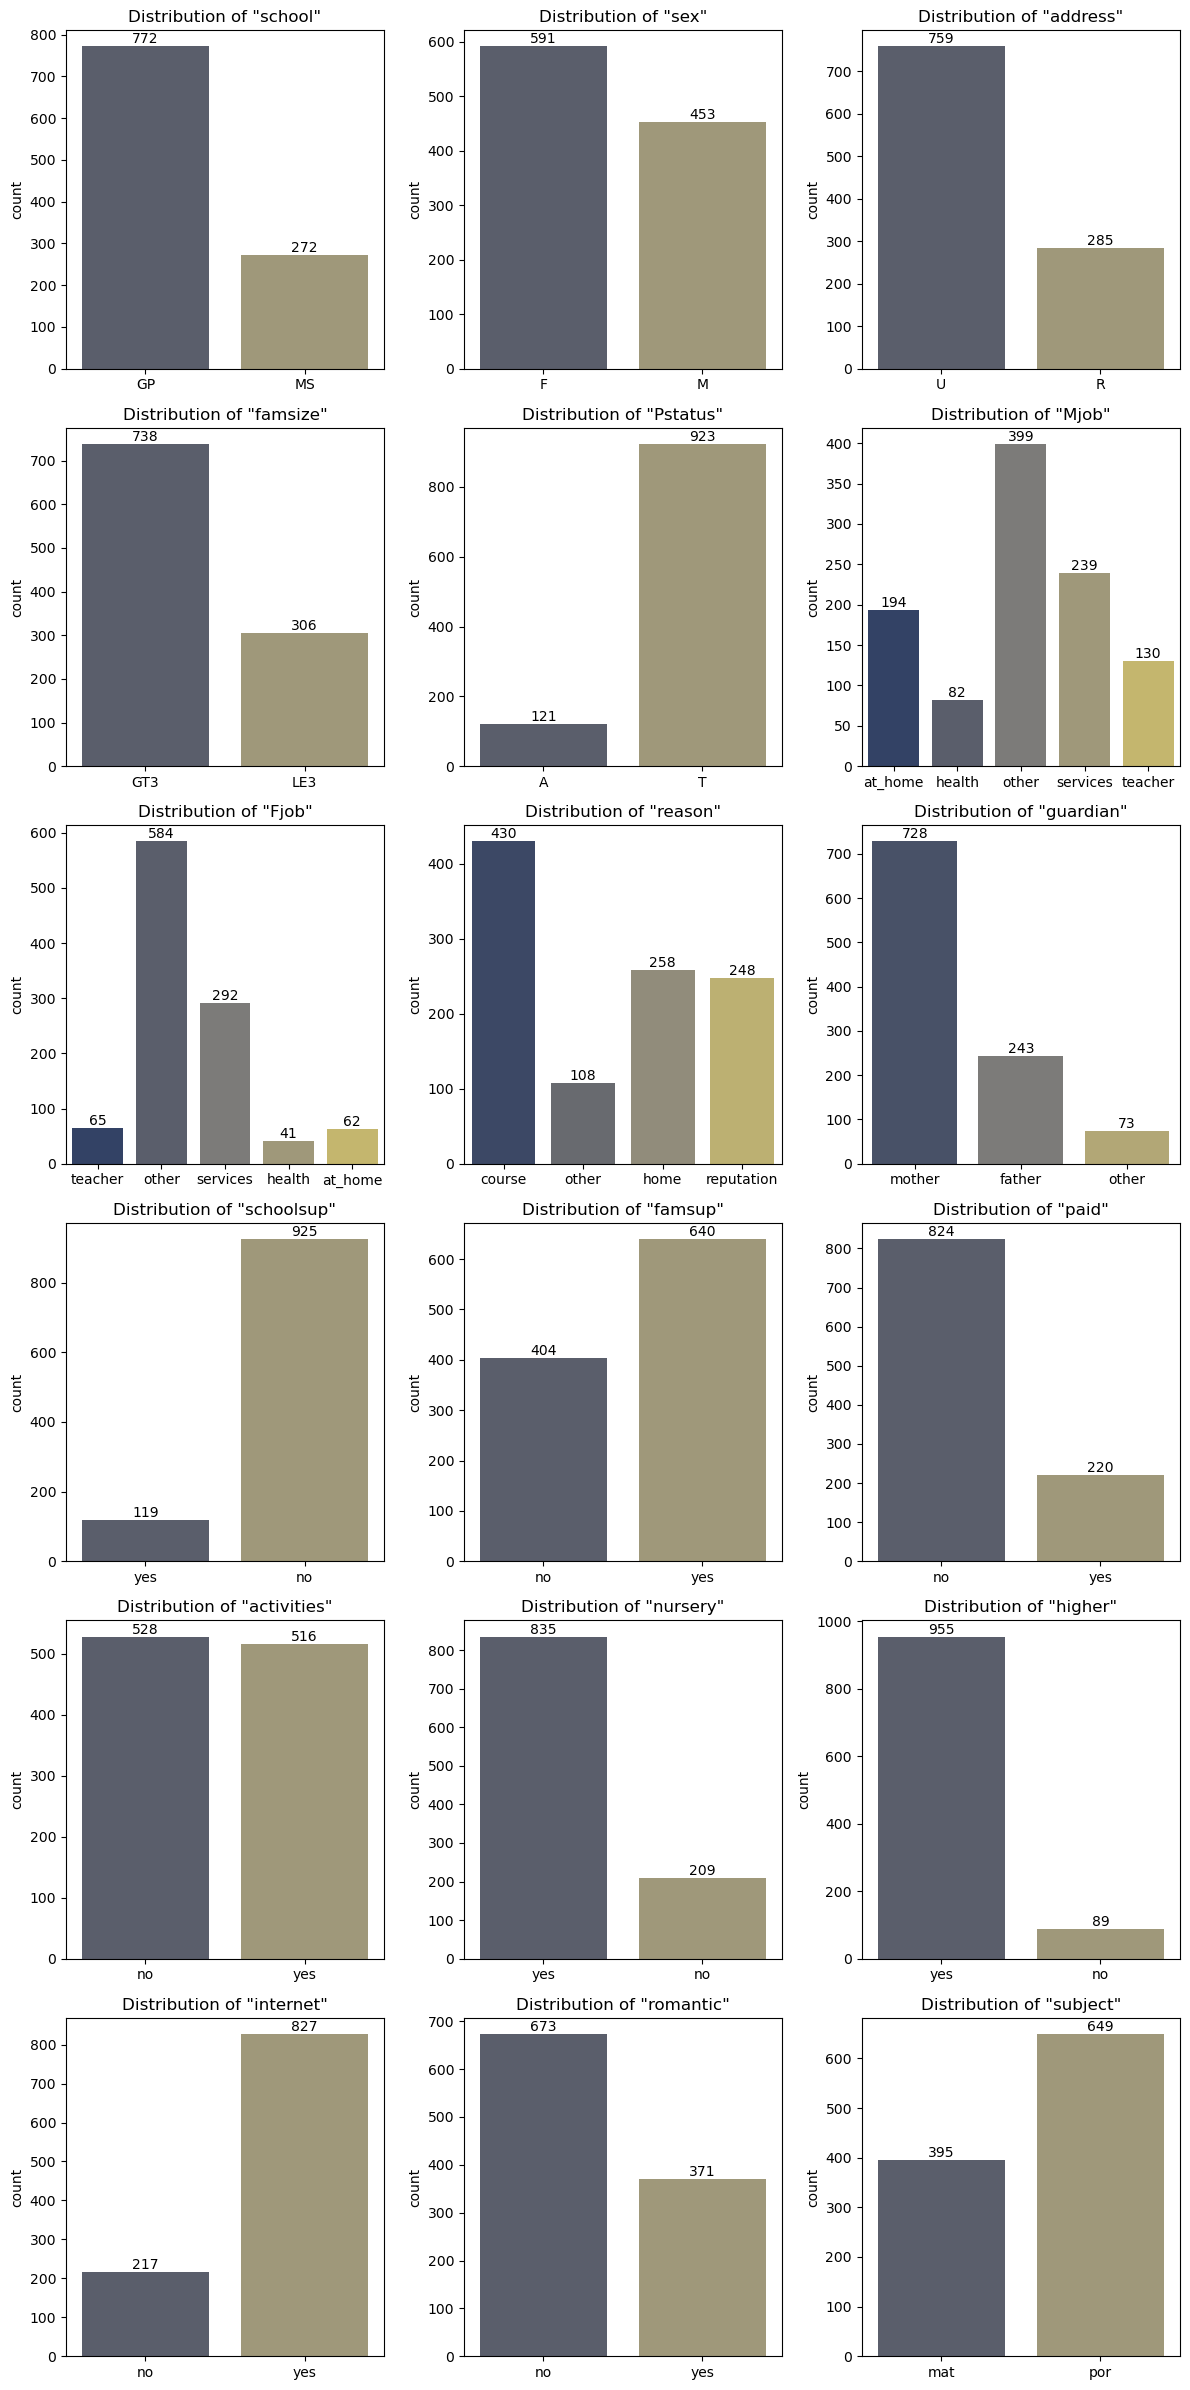

In [7]:
# Visualization các cột categorical
n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))  # Tạo nhiều biểu đồ
axes = axes.flatten() # Làm phẳng mảng axes

for i, colname in enumerate(cat_cols):
    sns.countplot(data=df, x=colname, ax=axes[i], palette="cividis", hue=colname)
    
    axes[i].set_title(f'Distribution of \"{colname}\"')
    axes[i].set_xlabel('')

    for container in axes[i].containers:
        axes[i].bar_label(container)

# Tắt các ô trống nếu số biểu đồ không lấp đầy lưới
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Nhận xét:**
- Cột khá cân bằng: `sex`, `activities`

- Cột mất cân bằng cao (`Pstatus`, `schoolsup`, `higher`): `Pstatus = T` (88%), `schoolsup = no` (88%), `higher = yes` (90%) $\rightarrow$ Những cột này sẽ ít có khả năng phân loại vì không có sự biến thiên mà chỉ thiên về 1 phía. Gây ra Model bias nếu sử dụng làm `Target`

- Cột mất cân bằng vừa: các cột còn lại 

### Data Quality

In [ ]:
# Kiểm tra tính nhất quán của các cột
for colname in cat_cols:
    unique_vals = sorted(df[colname].unique().astype(str))
    print(f"{colname} : {unique_vals}")

school : ['GP', 'MS']
sex : ['F', 'M']
address : ['R', 'U']
famsize : ['GT3', 'LE3']
Pstatus : ['A', 'T']
Mjob : ['at_home', 'health', 'other', 'services', 'teacher']
Fjob : ['at_home', 'health', 'other', 'services', 'teacher']
reason : ['course', 'home', 'other', 'reputation']
guardian : ['father', 'mother', 'other']
schoolsup : ['no', 'yes']
famsup : ['no', 'yes']
paid : ['no', 'yes']
activities : ['no', 'yes']
nursery : ['no', 'yes']
higher : ['no', 'yes']
internet : ['no', 'yes']
romantic : ['no', 'yes']
subject : ['mat', 'por']


In [14]:
# Kiểm tra có các giá trị bị thiếu hay không
missing_vals = df[cat_cols].isnull().sum()
percent_missing = missing_vals * 100 / len(missing_vals)
print(f"Percent of missing value in categorical columns:\n{percent_missing}")

Percent of missing value in categorical columns:
school        0.0
sex           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
subject       0.0
dtype: float64


**Nhận xét:** 
- Không có cột nào có giá trị bị thiếu, giá trị bất thường

- Tuy nhiên, đối với cột `Fjob` ta thấy `health` chỉ chiếm số lượng ít (3.93%) và kích thước mẫu của nhóm khá nhỏ (n = 41) nhưng vẫn đủ ngưỡng tối thiểu để thực hiện các so sánh thống kê

### **Nhận xét chung:** 
- Các cột dữ liệu category: `school`, `sex`, `address`, `famsize`, `Pstatus`, `Mjob`, `Fjob`, `reason`, `guardian`, `schoolsup`, `famsup`, `paid`, `activities`, `nursery`, `higher`, `internet`, `romantic`, `subject`

- Các cột đều bị mất cân bằng dữ liệu (trừ cột `sex`, `activities` khá cân bằng)

- Các cột không có các giá trị bất thường, lỗi hay các giá trị hiếm (trừ `Fjob` nhưng nhóm quyết định giữ giá trị hiếm lại mà không gộp chung)

## Initial Observation and Insights

### **Summary**
**1. Key observation:**
- Sự bất thường của Target (`G3`): điểm số có phân phối gần chuẩn nhưng có 53 trường hợp xuất hiện điểm bằng 0. Kèm theo đó là khi `G3` = 0 thì `absences` = 0, điều này là khá vô lý vì theo hành vi học tập, nếu không nghỉ buổi nào nhưng có `G3` = 0. Bên cạnh đó, ta thấy `G1`, `G2` đa số > 0 nếu `G3` = 0  
$\rightarrow$ Có thể là những học sinh này đã bỏ thi, học lực kém, hoặc do các yếu tố tác động (hành vi uống rượu (?)) khiến cho `G3` bằng 0

- Phân phối lệch của `absences`: bị lệch phải nhiều (Skewness = 3.74). Trung vị là 2 nhưng xuất hiện các outlier rất lớn $\rightarrow$ Điều này cho thấy việc các học sinh có xu hướng ít nghỉ học, có 1 nhóm nhỏ nghỉ học nhiều.

- Sự đồng nhất về nhân khẩu học: có sự mất cân bằng lớn trong các biến: 90% có cha mẹ sống chung (`PStatus` = T), đa số có nguyện vọng học cao hơn (`higher` = yes) và có tham gia các lớp học thêm (`schoolsup` = yes)

**2. Data quality issues:**
- Imbalanced class: các cột category nhưng đã phân tích ở trên `Pstatus`, `higher`, `Fjob` bị mất cân bằng nghiêm trọng $\rightarrow$ giảm độ tin cậy khi phân tích hành vi của các nhóm này

**3. Necessary preprocessing steps:**
- Data Integration: Gộp hai bộ dữ liệu student-mat và student-por. Thêm cột định danh Subject ('Math'/'Por') để phân biệt ngữ cảnh môn học.

- Data cleaning:

- Feature Engineering:
    - Tạo `Total_alc` dựa vào `Dalc` và `Walc`

- Encoding: 
    - Sử dụng **Binary Encoding** cho các biến nhị phân (`school`, `sex`, `address`, `famsize`, ... )
    - Sử dụng **One-Hot Encoding** cho các biến có nhiều nhóm (`Mjob`, `Fjob`, `reason`, `guardian`, ... )

**4. Interesting patterns could lead to research questions:**
- Những học sinh có số `absences` cao thì sẽ tiêu thụ cồn (`Dalc`/`Walc`) nhiều nhất?

- Sự tương quan về quá trình học tập `G1`, `G2`, `G3`: các cặp (`G1`,`G2`), (`G2`, `G3`) có sự tương quan cao $\rightarrow$ nếu có học sinh đạt điểm thấp ở đầu kì thì rất có nhiều khả năng giữa kì và cuối kì điểm cũng sẽ thấp theo.

### **Red flags**
**1. Serious data quality concerns:**  

**2. Limitations might affect analysis:**  
